In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
classifier = Sequential()

In [3]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [4]:
#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [6]:
#Flattening
classifier.add(Flatten())

In [7]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


 #Fitting the CNN to the images

In [10]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Machine Learning/Mchine Learning Parctical/Cat Dog Classifier program/cats_and_dogs_filtered/cats_and_dogs_filtered/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1002 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('C:/Users/gaurav sahani/Desktop/Machine Learning/Mchine Learning Parctical/Cat Dog Classifier program/cats_and_dogs_filtered/cats_and_dogs_filtered/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 202 images belonging to 2 classes.


In [16]:
classifier.fit_generator(training_set,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 1000)


Epoch 1/25
32/32 [==============================] - 82s 3s/step - loss: 0.6959 - accuracy: 0.5060 - val_loss: 0.6921 - val_accuracy: 0.5298
Epoch 2/25
32/32 [==============================] - 79s 2s/step - loss: 0.6805 - accuracy: 0.5549 - val_loss: 0.7075 - val_accuracy: 0.5050
Epoch 3/25
32/32 [==============================] - 80s 2s/step - loss: 0.6739 - accuracy: 0.5918 - val_loss: 0.6181 - val_accuracy: 0.5843
Epoch 4/25
32/32 [==============================] - 80s 2s/step - loss: 0.6434 - accuracy: 0.6188 - val_loss: 0.5401 - val_accuracy: 0.6139
Epoch 5/25
32/32 [==============================] - 80s 3s/step - loss: 0.5908 - accuracy: 0.6886 - val_loss: 0.5537 - val_accuracy: 0.6383
Epoch 6/25
32/32 [==============================] - 79s 2s/step - loss: 0.5655 - accuracy: 0.7086 - val_loss: 0.7324 - val_accuracy: 0.6583
Epoch 7/25
32/32 [==============================] - 79s 2s/step - loss: 0.5198 - accuracy: 0.7405 - val_loss: 0.5040 - val_accuracy: 0.6635
Epoch 8/25
32/32 [=

In [18]:
#Making new predictions
import numpy as np
from keras.preprocessing import image

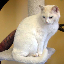

In [45]:
test_image=image.load_img('C:/Users/gaurav sahani/Desktop/Machine Learning/Mchine Learning Parctical/Cat Dog Classifier program/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats/cat.2080.jpg', target_size = (64, 64))
test_image

In [46]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis = 0)

In [47]:
result = classifier.predict(test_image)
result

array([[0.]], dtype=float32)

In [48]:
if result==1:
    print("Its a Dog")
else:
    print("Its a Cat")

Its a Cat
